In [5]:
import yfinance as yf
import pandas as pd

In [22]:
# Get Tesla stock data
Ticker = yf.Ticker('TSLA')
df = pd.DataFrame(Ticker.history(period='max'))

# Reset the index and save to tesla_data
tesla_data = df.reset_index()

# Display the first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [51]:
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
soup = BeautifulSoup(requests.get(url).text, "html.parser")

# Find the Tesla Quarterly Revenue table by matching text
table = next((t for t in soup.find_all("table", class_="historical_data_table table")
              if "Tesla Quarterly Revenue" in t.find("th", colspan="2").get_text(strip=True)), None)

# Extract and clean data
if table:
    rows = table.find_all("tr")[1:]
    data = [(r.find_all("td")[0].text.strip(), r.find_all("td")[1].text.strip()) for r in rows]
    tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
    tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"].str.replace(r'[\$,]', "", regex=True))
    print(tesla_revenue.tail())
else:
    print("Tesla Quarterly Revenue table not found.")

          Date  Revenue
49  2010-06-30     28.0
50  2010-03-31     21.0
51  2009-12-31      NaN
52  2009-09-30     46.0
53  2009-06-30     27.0


In [52]:
# Get GameStop stock data
Ticker = yf.Ticker('GME')
df = pd.DataFrame(Ticker.history(period='max'))

# Reset the index and save to tesla_data
gme_data = df.reset_index()

# Display the first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [54]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
soup = BeautifulSoup(requests.get(url).text, "html.parser")

# Find the GME Quarterly Revenue table by matching text
table = next((t for t in soup.find_all("table", class_="historical_data_table table")
              if "GameStop Quarterly Revenue" in t.find("th", colspan="2").get_text(strip=True)), None)

# Extract and clean data
if table:
    rows = table.find_all("tr")[1:]
    data = [(r.find_all("td")[0].text.strip(), r.find_all("td")[1].text.strip()) for r in rows]
    gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
    gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"].str.replace(r'[\$,]', "", regex=True))
    print(gme_revenue.tail())
else:
    print("GameStop Quarterly Revenue table not found.")

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


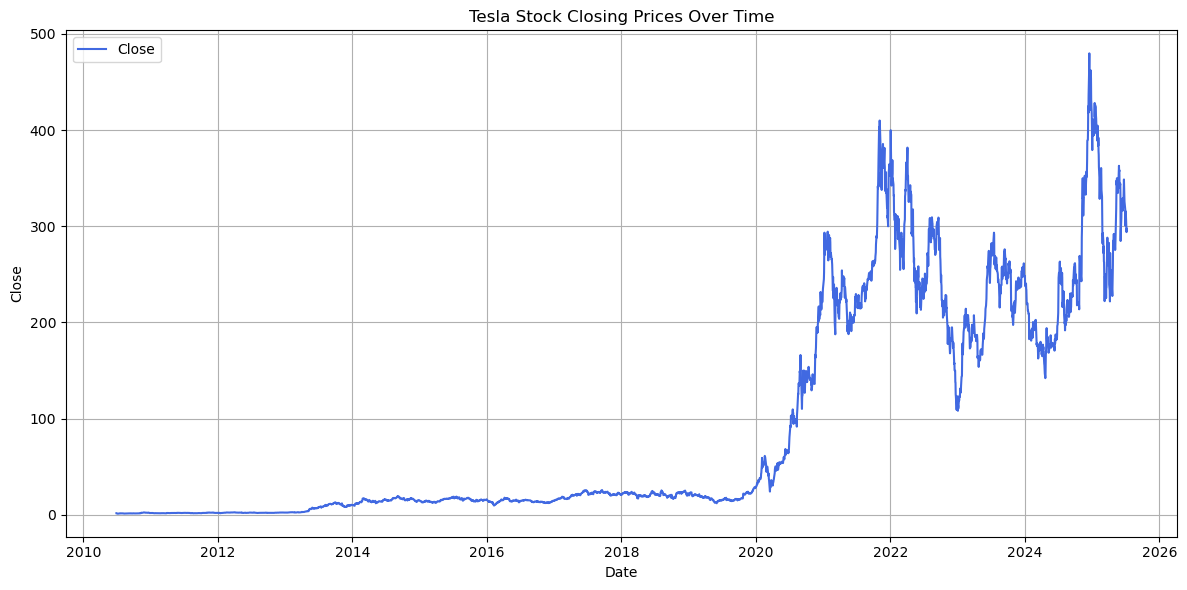

In [56]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch Tesla stock data
ticker = yf.Ticker("TSLA")
df = ticker.history(period="max").reset_index()

# Define the graph function
def make_graph(data, x_col, y_col, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data[x_col], data[y_col], label=y_col, color='royalblue')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Use the function to graph Tesla closing prices
make_graph(df, "Date", "Close", "Tesla Stock Closing Prices Over Time")

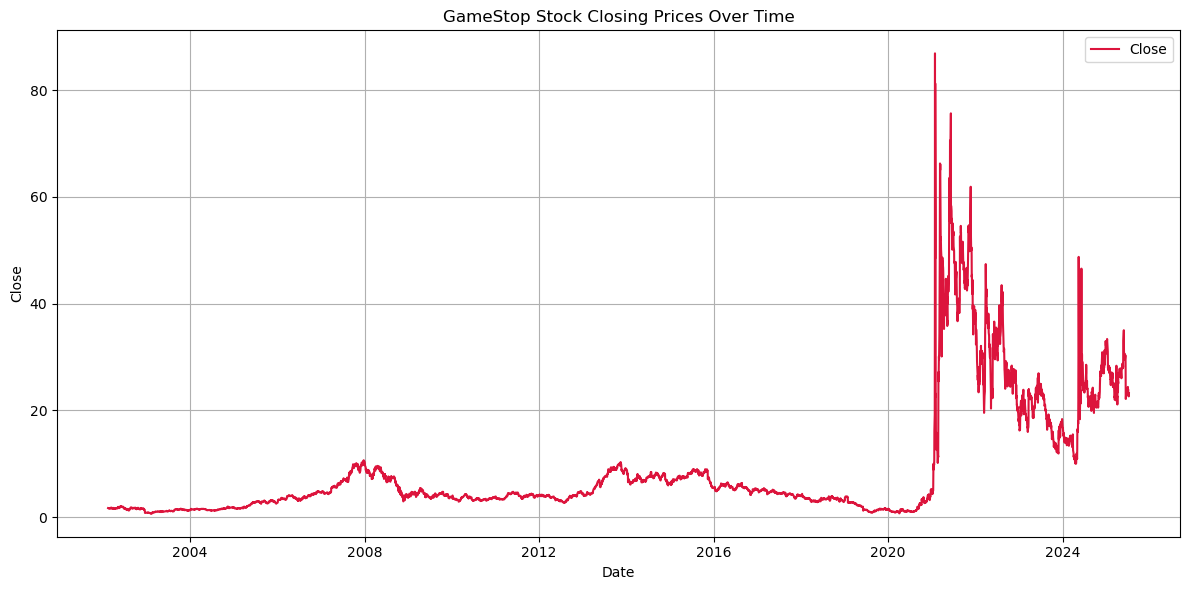

In [57]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch GameStop stock data
gme_df = yf.Ticker("GME").history(period="max").reset_index()

# Define the graphing function
def make_graph(data, x_col, y_col, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data[x_col], data[y_col], label=y_col, color='crimson')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Graph GME stock closing prices
make_graph(gme_df, "Date", "Close", "GameStop Stock Closing Prices Over Time")